## 4. Representing Data and Engineering Features
#### Feature Engineering for Machine Learning
https://serokell.io/blog/feature-engineering-for-machine-learning
#### 8 Feature Engineering Techniques for Machine Learning
https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423
#### Feature Engine
https://feature-engine.trainindata.com/en/latest/quickstart/index.html

### Feature Engineering:

Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.

Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

* The topics to be examined in this context are as follows:
    1. *Outliers*
    2. *Missing Values*
    3. *Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)*
    4. *Feature Scaling*
    5. *Feature Extraction*

<hr style="border:2px solid green">

#### 4.1. *Outliers*
Outliers are data points with very different values in a data set than others. Outliers may result from data collection or measurement errors or may represent rare events or phenomena that are not typical of the data.

* Interquartile range (IQR) is the difference between the third quartile (Q3) and the first quartile (Q1) in a dataset. So, IQR = Q3 — Q1.
* IQR is used to measure variability in the dataset. Because IQR is a metric unaffected by the mean in the dataset, it does not consider extreme values or outliers. IQR is also used to create visual aids such as box plots.
* The more significant the IQR of a dataset, the more variability it indicates. When used with the median, a central measure of the dataset, IQR is used better to understand the spread and distribution of a dataset.

#### [Ref] Feature Engineering -- 5. 異常值
https://ithelp.ithome.com.tw/articles/10236317

<hr style="border:2px solid green">

#### 4.2. *Missing Values*
Missing values are when one or more observations or variables in a dataset have missing or unknown values.

* There are several methods for dealing with missing data. These:
    * Deleting missing values: Complete deletion of rows or columns containing missing values.
    * Value assignment: Filling in missing values with a value such as the mean, median, or most common value.
    * Estimation: Estimating missing values using other variables. This can be done with techniques such as regression analysis or machine learning.
    * Modeling: Training a model based on subsets without missing values.

* Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

    * isnull()
    * notnull()
    * dropna()
    * fillna()
    * replace()
    * interpolate()

#### [Ref] Working with Missing Data in Pandas
https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

<hr style="border:2px solid green">

#### 4.3. *Feature Scaling*
Feature scaling is a process used to convert the values of features in a dataset to a specific range or unit of measure. This process can make machine learning models perform better.

* The most common feature scaling methods are:
    * Normalization (Min-Max Scaling): In this method, feature values are scaled within a certain range (usually 0–1 range). This ensures that all property values are on the same scale.
    * Standardization: In this method, feature values are subtracted from the mean value and divided by the standard deviation. This ensures that the features are normally distributed.
    * Robust Scaling: This method is used to reduce the effect of outliers in the dataset. Feature values are subtracted from the median rather than the mean, divided by the median value.

#### 4.3.1. *Min-Max Scaler*
It scales the values between 0 and 1(by default). In the default cases, the minimum value in the series will be zero. If we don’t want the minimum value to be zero we can define another range, too.
\begin{equation}
\begin{split}
x_{scaled} = \frac{x-x_{min}} {x_{max}-x_{min}}
\end{split}
\end{equation}

Normalizing (range [0,1]) is important if the range of each feature is very different from one another. And it doesn’t need to assume that the distribution of feature is normal. It may increase overfitting.

#### 4.3.2. *Standard Scaler*
Also called Z Score Normalization. It scales the values between two standard deviation range, resizes the values in 1 standard deviation range and makes median 0. This method assumes that the feature has normal distribution. It helps to reduce overfitting when used properly.
\begin{equation}
\begin{split}
x_{scaled} = \frac{x - mean(x)} {std(x)}
\end{split}
\end{equation}

#### 4.3.3. *MaxAbs Scaler*
All values in the feature are divided by the absolute maximum value of that feature. Thus, the range becomes [-1,1]. If we want to keep 0 values as 0, we can use this method.

\begin{equation}
\begin{split}
x_{scaled} = \frac{x} {| x_{max}| }
\end{split}
\end{equation}

#### 4.3.4. *Robust Scaler*
When we perform the scaling operation with constant values (mean, maximum value, etc.), the operation becomes vulnerable to outlier values. If there are a lot of outliers in the data, scaling over IQR can provide a more robust distribution. It scales the values between a median of 0.
\begin{equation}
\begin{split}
x_{scaled} = \frac{x - Q2(x)} {Q3(x)-Q1(x)}
\end{split}
\end{equation}

#### 4.3.5. *Quantile Transformer Scaler*
It converts feature distribution to normal distribution. Hereby, it also takes care of outliers. It uses a cumulative distribution function. It is better to use this scaler for non-linear relationships because it can break linear relationships when scaling and transforming the distribution. It scales the values into a range of 0 to 1.

#### [REF] Data Pre-Processing with Scikit-Learn
https://medium.datadriveninvestor.com/data-pre-processing-with-scikit-learn-9896c561ef2f
#### [REF] 5 Data Transformers to know from Scikit-Learn
https://towardsdatascience.com/5-data-transformers-to-know-from-scikit-learn-612bc48b8c89

<hr style="border:2px solid green">

#### 4. Encoding
Encoding is the numerical representation of categorical or text data in a dataset. Machine learning applications often use numeric data and thus, it is necessary to convert categorical or text data into numeric data.

* The most common encoding techniques are:
    * *Label Encoding*: In this method, each category is assigned a unique number. This method is only suitable for sequential data.
    * *Binary Encoding*: It is a variation of One-hot encoding. Categorical variables are encoded as two new variables. This method is especially useful for large data sets.
    * *One-Hot Encoding*: It is a frequently used method for converting categorical variables to numeric data. In this method, each category is represented as one of the elements of a vector. In these vectors, only the relevant category is encoded as 1 and the other elements remain 0.
    * *Rare encoding*: Attempts to enable machine learning models to learn rare classes more accurately by reducing the frequency of rare classes. In this method, rare classes are combined to form a new class, or rare classes are combined to form a larger class.

In [1]:
from sklearn.model_selection import train_test_split
from feature_engine.datasets import load_titanic
from feature_engine.encoding import CountFrequencyEncoder

X, y = load_titanic(
    return_X_y_frame=True,
    handle_missing=True,
    predictors_only=True,
    cabin="letter_only",
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

print(X_train.head())

      pclass     sex        age  sibsp  parch     fare cabin embarked
501        2  female  13.000000      0      1  19.5000     M        S
588        2  female   4.000000      1      1  23.0000     M        S
402        2  female  30.000000      1      0  13.8583     M        C
1193       3    male  29.881135      0      0   7.7250     M        Q
686        3  female  22.000000      0      0   7.7250     M        Q


PassengerId（乘客ID），Name（姓名），Ticket（船票資訊）存在唯一性，三類意義不大，可以考慮不加入後續的分析；
Survived（獲救情形）變數為因變量，其值只有兩類1或0，代表獲救或未獲救；
Pclass（乘客等級），Sex（性別），Embarked（登船港口）是明顯的類別型數據，而Age（年齡），SibSp（堂兄弟妹個數），Parch（父母與小孩的個數）則是隱性的類別型資料；Fare（票價）為數值型資料；Cabin（船艙）則為文字型資料；
Age（年齡），Cabin（船艙）和Embarked（登船港口）資訊有缺失資料。

#### 4.4.1. *Integer / Label Encoding*
Each unique group in the feature is assigned a number. There is no relationship between the numbers given and the groups from the point of view of information.

In [1]:
from sklearn.preprocessing import LabelEncoder
x = ["Bmw","Mercedes","Bmw","Audi"]
encoder = LabelEncoder()
encoder.fit_transform(x)
#Out: array([1, 2, 1, 0])

array([1, 2, 1, 0], dtype=int64)

####  4.4.2. *Ordinal Encoding*
If we can establish an ordering relationship between categorical values, then we can perform an ordinal encoding. For example, consider a survey question answer, the options are “never, sometimes, and always”. In the range [0,2], we can assign 0 for “never”, 1 for “sometimes” and 2 for “always”.

Weight of Evidence Encoder
We can explain WoE in terms of an event. An event means whether an example is valid (for example a person is “Survived” or for non-event, it is “Not-Survived”). Then, we calculate it by taking the natural logarithm of the event ratio. Note that the target feature must be a binary.

WOE = ln(event% / non-event %)

It can be used in Logistic Regression since the approach is similar, actually, it evolved from Logistic Regression.

In [2]:
from feature_engine.encoding import OrdinalEncoder
encoder = OrdinalEncoder(
    encoding_method='ordered',
    variables=['pclass', 'cabin', 'embarked'],
    ignore_format=True)

encoder.fit(X_train, y_train)
encoder.encoder_dict_

{'pclass': {3: 0, 2: 1, 1: 2},
 'cabin': {'T': 0,
  'M': 1,
  'G': 2,
  'A': 3,
  'C': 4,
  'F': 5,
  'D': 6,
  'E': 7,
  'B': 8},
 'embarked': {'S': 0, 'Q': 1, 'C': 2, 'Missing': 3}}

In [3]:
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

print(train_t.head())

      pclass     sex        age  sibsp  parch     fare  cabin  embarked
501        1  female  13.000000      0      1  19.5000      1         0
588        1  female   4.000000      1      1  23.0000      1         0
402        1  female  30.000000      1      0  13.8583      1         2
1193       0    male  29.881135      0      0   7.7250      1         1
686        0  female  22.000000      0      0   7.7250      1         1


#### [REF] Ordinal and One-Hot Encodings for Categorical Data
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

#### 4.4.3. *One Hot Encoder*
The integer value assigned to the unique groups is converted to the binary value in themselves. There will be as many binary values as the number of groups. Each data takes a value of 1 in that column for its own group and 0 in other columns.

In [1]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

data = asarray([['red'], ['green'], ['blue']])
encoder = OneHotEncoder(sparse_output=False)
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


It is useful to be careful when using One Hot Encoding. Because it creates more than one feature from a single feature, if there are too many groups, it can create too many new features and these new features can be correlated with each other.

####  4.4.4. *Count and Frequency Encoding*
Category group names are replaced by their number or frequency in the feature. Frequency encoding can be used if the target variable and feature have a frequency-related relationship. It works well with tree algorithms.

We can use the feature_engine library for this purpose.

The CountFrequencyEncoder() replaces categories by either the count or the percentage of observations per category. For example in the variable colour, if 10 observations are blue, blue will be replaced by 10. Alternatively, if 10% of the observations are blue, blue will be replaced by 0.1.

In [4]:
encoder = CountFrequencyEncoder(
encoding_method='frequency',
variables=['cabin', 'pclass', 'embarked'],
ignore_format=True,
)

encoder.fit(X_train)
encoder.encoder_dict_

{'cabin': {'M': 0.7663755458515283,
  'C': 0.07751091703056769,
  'B': 0.04585152838427948,
  'E': 0.034934497816593885,
  'D': 0.034934497816593885,
  'A': 0.018558951965065504,
  'F': 0.016375545851528384,
  'G': 0.004366812227074236,
  'T': 0.001091703056768559},
 'pclass': {3: 0.5436681222707423,
  1: 0.25109170305676853,
  2: 0.2052401746724891},
 'embarked': {'S': 0.7117903930131004,
  'C': 0.19541484716157206,
  'Q': 0.0906113537117904,
  'Missing': 0.002183406113537118}}

In [5]:
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

print(train_t.head())

        pclass     sex        age  sibsp  parch     fare     cabin  embarked
501   0.205240  female  13.000000      0      1  19.5000  0.766376  0.711790
588   0.205240  female   4.000000      1      1  23.0000  0.766376  0.711790
402   0.205240  female  30.000000      1      0  13.8583  0.766376  0.195415
1193  0.543668    male  29.881135      0      0   7.7250  0.766376  0.090611
686   0.543668  female  22.000000      0      0   7.7250  0.766376  0.090611


####  4.4.5. *Mean Encoding*
It takes the mean value of the target feature for all category groups within a feature and assigns it to each category. Note that the target must be a numerical feature.

The MeanEncoder() replaces categories with the mean of the target per category. For example, if we are trying to predict default rate, and our data has the variable city, with categories, London, Manchester and Bristol, and the default rate per city is 0.1, 0.5, and 0.3, respectively, the encoder will replace London by 0.1, Manchester by 0.5 and Bristol by 0.3.

In [6]:
from feature_engine.encoding import MeanEncoder
encoder = MeanEncoder(
    variables=['cabin', 'pclass', 'embarked'],
    ignore_format=True,
)

encoder.fit(X_train, y_train)
encoder.encoder_dict_

{'cabin': {'A': 0.5294117647058824,
  'B': 0.7619047619047619,
  'C': 0.5633802816901409,
  'D': 0.71875,
  'E': 0.71875,
  'F': 0.6666666666666666,
  'G': 0.5,
  'M': 0.30484330484330485,
  'T': 0.0},
 'pclass': {1: 0.6173913043478261,
  2: 0.43617021276595747,
  3: 0.25903614457831325},
 'embarked': {'C': 0.553072625698324,
  'Missing': 1.0,
  'Q': 0.37349397590361444,
  'S': 0.3389570552147239}}

In [7]:
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

print(train_t.head())

        pclass     sex        age  sibsp  parch     fare     cabin  embarked
501   0.436170  female  13.000000      0      1  19.5000  0.304843  0.338957
588   0.436170  female   4.000000      1      1  23.0000  0.304843  0.338957
402   0.436170  female  30.000000      1      0  13.8583  0.304843  0.553073
1193  0.259036    male  29.881135      0      0   7.7250  0.304843  0.373494
686   0.259036  female  22.000000      0      0   7.7250  0.304843  0.373494


####  4.4.6. *Hashing Encoding*
In this method, categorical variables are transformed into a set of higher-dimensional numbers. However, since the total number of dimensions will be lower than the One Hot Encoding method, hashing method can be tried in case of a high cardinality problem.

We can limit the number of dimensions by setting the n_component argument. However, some information is obviously sacrificed by limiting the dimension space. Hashing Encoder uses md5 hashing algorithm by default.

In [8]:
import category_encoders as ce
encoder=ce.HashingEncoder(cols='Cabin',n_components=4)

In windows, we should run Hash Encoder in the main function because it uses multi processes:

In [26]:
from category_encoders.hashing import HashingEncoder

encoder = HashingEncoder(
    cols=['pclass', 'cabin', 'embarked'],
    n_components = 4)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_train_enc

,col_0,col_1,col_2,col_3,sex,age,sibsp,parch,fare
501,2,0,1,0,female,13.000000,0,1,19.5000
588,2,0,1,0,female,4.000000,1,1,23.0000
402,2,0,0,1,female,30.000000,1,0,13.8583
1193,1,0,1,1,male,29.881135,0,0,7.7250
686,1,0,1,1,female,22.000000,0,0,7.7250
...,...,...,...,...,...,...,...,...,...
763,1,0,1,1,female,0.166700,1,2,20.5750
835,1,0,1,1,male,29.881135,0,0,8.0500
1216,1,0,1,1,female,29.881135,0,0,7.7333
559,2,0,1,0,female,20.000000,0,0,36.7500


<hr style="border:2px solid green">

#### 5. Feature Transform
Feature Extraction is a method used to extract meaningful information from a large and complex dataset. This method creates a new feature set by selecting or removing features from the dataset.

* Feature Extraction is a technique used in data preprocessing and is particularly useful for large datasets. Feature Extraction is especially used in machine learning and data analysis areas.
    * Binary properties: Properties that only have two different values. These values are usually expressed as 0 and 1.
    * Text features: It is extracting meaningful features from text data. These features can be used for better understanding and analysis of text data. Text data features can include word frequency, word length, sentence length, word variety, unique word count, sentence structures, grammatical structures, and emotional intonations.
    * Regex (Regular Expression): A set of characters used to identify specific patterns within a text. Regex features can identify and extract specific patterns in text data.
    * Date features: The process of extracting meaningful features from date and time data. These features can be used to understand better and analyze date and time data. Examples of Date features are day, month, year, day of the week, hour, minute, second, time of day (morning, afternoon, evening), day of the week (weekend, etc.), holiday or non-holiday.

#### 5.1. *Gaussian Transformations*
Many machine learning models work best if the features have Gaussian distributions. There are numerous methods to transform features to normal distribution.

#### 5.2. *Log Transformation*
Log transformation is one of the most used Gaussian transformation methods. The log of each value is taken in feature, a nice way to deal with large numbers (Log of 1,000,000 is only 6). Thus, it reduces the impact of both high and low values in features.

It is used to approximate non-normally distributed data to the normal distribution. It is generally used for right-skewed features. Since it is logarithmic, it cannot be used for features that have negative values.

x_log = np.log(x)
The feature shown below is slightly right-skewed (upper charts). After the logarithmic transition, it is better at the point of Gaussian distribution.

#### 5.3. *Reciprocal Transformation*
It cannot be applied to the value of zero. It reverses the order between data with the same sign, i.e., larger values become small and vice versa (or like rewinding the time). It can be applied to right-skewed data.

Let’s use Reciprocal transformation to the above feature.

#### 5.4. *Square Transformation*
It is generally applied to left-skewed data.

#### 5.5. *Square Root Transformation*
It is only valid for positive numbers and is generally applied to right-skewed data.

Let’s generate right-skewed data for exploration (just set the skewness value to positive in the data generation code above).

#### 5.6. *Power Transformations*
Can be used when there is heteroskedasticity which is a concern in linear relationships. It means that the variance of residuals isn’t constant (so, there is a pattern in the variance).

Power transformation makes data more Gaussian-like. These methods use a parameter called lambda. This parameter helps to reduce skewness and stabilize the variance.

#### 5.7. *Box-Cox Transformation*
This is included in the concept of power transformations. Data must be positive. Lambda, λ is a value between -5 and 5. An optimal lambda value should be selected (like hyperparameter tuning).

We can use also scipy.stats to calculate lambda.

#### 5.8. *Yeo-Johnson Transformation*
The power transformation technique if the data contains zero or negative values.

#### Data Set 1: One-Hot-Encoding (Dummy variables)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from pandasgui import show

In [10]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
root_folder = os.path.dirname(os.getcwd())
root_folder

'E:\\Dropbox\\Codes\\Python\\Machine Learning with Application'

In [11]:
adult_path = os.path.join(root_folder, "datasets\\adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [12]:
show(data)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\ipykernel\eventloops.py:113: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\ipykernel\eventloops.py:113: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\ipykernel\eventloops.py:113: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\hao\anaconda3\envs\Pytho3

We are provided with 15 features(columns), our end goal is to predict the income feature which makes income as our Dependent Variable. If any of the remaining 14 features are affecting the target feature, then those features are known as Independent Variables.

To maintain the brevity of the article and to avoid irrelevant data for our model, we will avoid the less unique or noisy features from our input data. This helps us to refine our features to identify the independent variables. But, this might not apply to all datasets, it depends on what kind of data you are dealing with and how important is the feature.

* By these visualizations, we can deduce some correlations between our independent attributes and dependent attribute:

    1. Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.
    2. Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.
    3. The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income. relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K.
    4. As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.
    5. Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.
    6. We can see that all of our numerical attributes have some influence on our target variable income. So, we should create an ML model by feeding all of our numerical data as input to it.

* Issues:
    * 是否存在大量觀測值缺失的特徵值？
    * 是否有缺少的功能可能會影響其他功能？
    * 是否有任何意外的功能值？
    * 看到什麼數據偏斜跡象？

In [29]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [28]:
data['workclass'].value_counts().loc[' ?']

1836

##### Checking string-encoded categorical data

In [34]:
# Convert categorical variable into dummy/indicator variables.
data_dummies = pd.get_dummies(data)
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
logreg = LogisticRegression( max_iter=1000)
logreg.fit(X_train, y_train)
print("Test score: {:.3f}".format(logreg.score(X_test, y_test)))

Test score: 0.812


C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Numbers Can Encode Categoricals

In [37]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [38]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [39]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


#### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [40]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [41]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [44]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.3f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.809


In [45]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False, sparse_output=False)

#### Convenient ColumnTransformer creation with ``make_columntransformer``

In [46]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

#### Binning, Discretization, Linear Models, and Trees

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from pandasgui import show

data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]
X = X.astype(np.float32)

features = ['CRIM', 'ZN','INDUS', 'CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT', 'MEDV']
boston_df = pd.DataFrame(np.c_[X,y], columns = features)
#show(boston_df)

#### Linear Regression
https://www-activestate-com.translate.goog/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/?_x_tr_sl=en&_x_tr_tl=zh-TW&_x_tr_hl=zh-TW&_x_tr_pto=sc

#### Decision Tree Regressor 
https://towardsdatascience.com/decision-tree-regressor-a-visual-guide-with-scikit-learn-2aa9e01f5d7f

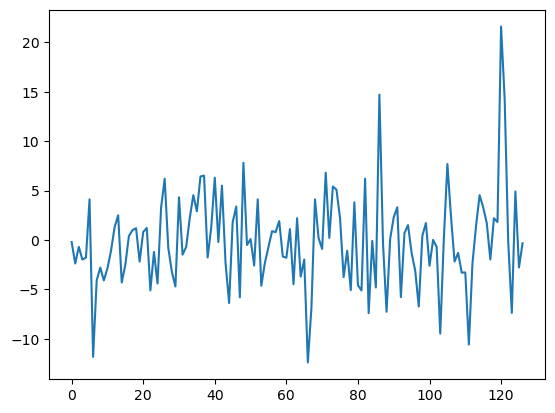

In [48]:
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

#lr = LinearRegression().fit(X_train, y_train)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3).fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.plot(y_test - y_pred, label="decision tree")

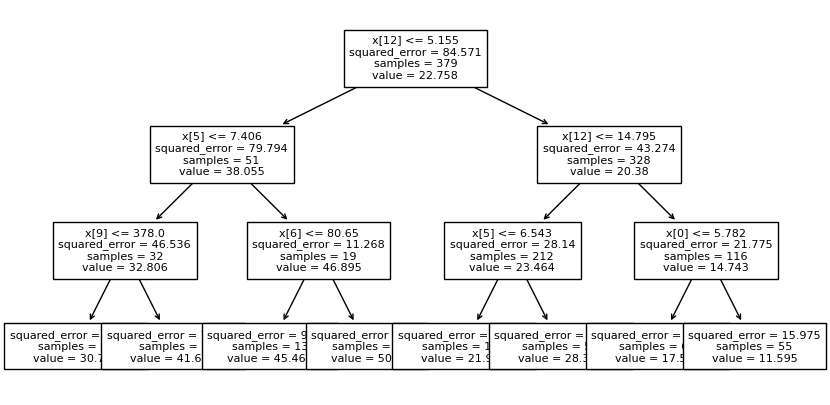

In [49]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 5))
tree.plot_tree(reg, fontsize=8)
plt.show()

#### 機器學習-特徵預處理-處理連續型數據
http://www.taroballz.com/2019/06/09/ML_continueVar_Preprocessing/

In [50]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X_train)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([6.32000016e-03, 8.90330763e+00, 1.78002953e+01, 2.66972829e+01,
        3.55942705e+01, 4.44912581e+01, 5.33882458e+01, 6.22852334e+01,
        7.11822210e+01, 8.00792087e+01, 8.89761963e+01])
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])
 array([ 0.74000001,  3.43999999,  6.13999996,  8.83999994, 11.53999991,
        14.23999989, 16.93999987, 19.63999984, 22.33999982, 25.03999979,
        27.73999977])
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
 array([0.38499999, 0.43359999, 0.48219999, 0.53079999, 0.57939999,
        0.62799999, 0.67659999, 0.72519999, 0.77379999, 0.82239999,
        0.87099999])
 array([3.56100011, 4.08290007, 4.60480003, 5.1267    , 5.64859996,
        6.17049992, 6.69239988, 7.21429985, 7.73619981, 8.25809977,
        8.77999973])
 array([  2.9000001 ,  12.61000009,  22.32000008,  32.03000007,
         41.74000006,  51.45000005,  61.16000004,  70.87000003,
         80.58000002,  90.29000001, 1

C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning:

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.



In [51]:
X_binned = kb.transform(X)
X_binned

<506x130 sparse matrix of type '<class 'numpy.float32'>'
	with 6578 stored elements in Compressed Sparse Row format>

In [52]:
print(X[:10])
X_binned.toarray()[:10]

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]
 [2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
  5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
  5.2100e+00]
 [8.8290e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0120e+00
  6.6600e+01 5.5605e+00 5.0000e+

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

C:\Users\hao\anaconda3\envs\Pytho39\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning:

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.



### DataSet: Boston Price Case

In [56]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split( data, target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Polynomial Features
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [59]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


#### Ridge
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [60]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


#### Random Forest Regression
https://towardsdatascience.com/random-forest-regression-5f605132d19d

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.789
Score with interactions: 0.777


### Univariate Nonlinear Transformations

In [63]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [64]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

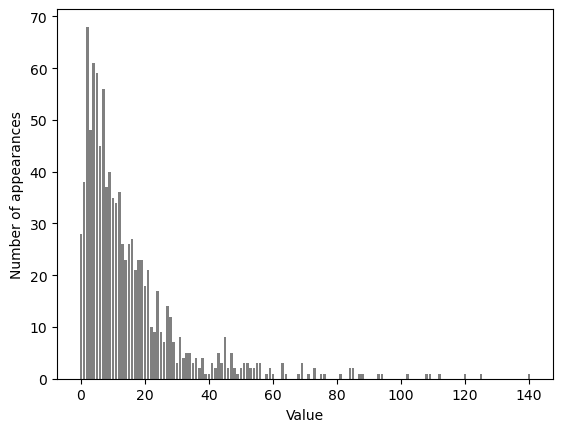

In [65]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [66]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [67]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

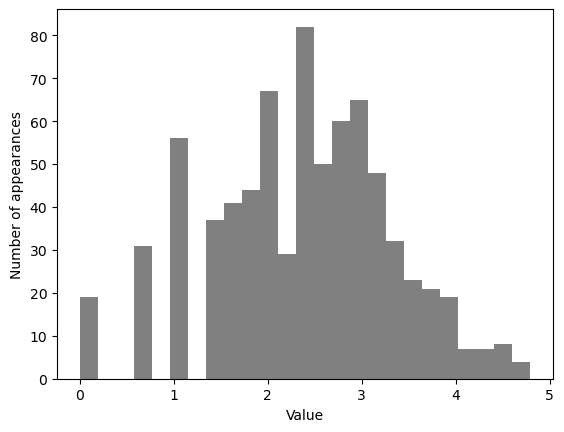

In [68]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [69]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


### Automatic Feature Selection
#### Univariate statistics

In [70]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

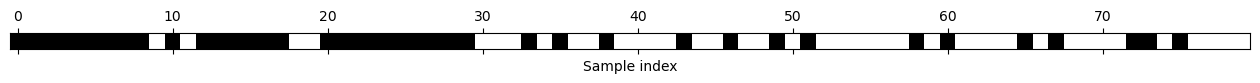

In [71]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [74]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.947
Score with only selected features: 0.933


#### Model-based Feature Selection

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [76]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], [])

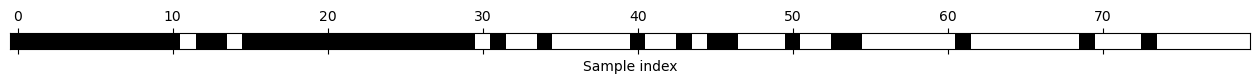

In [77]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [79]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947


#### Iterative feature selection

([], [])

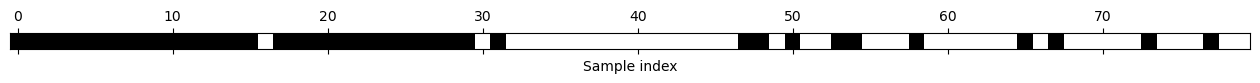

In [80]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [82]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.940


In [83]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


### Summary and Outlook

#### What Are The Feature Transformation Techniques?
https://python.plainenglish.io/what-are-the-feature-transformation-techniques-ba594b523ec4

#### Automated Feature Engineering in Python
https://towardsdatascience.com/automated-feature-engineering-in-python-5733426530bf